In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

In [3]:
random.seed(42)

shared = [ 
        'Season_End_Year',
         'Squad',
         'Comp',
         'Player',
         'Nation',
         'Pos',
         'Age',
         'Born',
         'Url'
         ]

In [4]:
years = [2018,2019,2020,2021,2022,2023,2024]
stat_types = ['standard',
                'shooting',
                'passing',
                'passing_types',
                'gca',
                'defense',
                'possession',
             #   'playing_time',
                'misc',
               # 'keepers',
               # 'keepers_adv'
             ]

data_dict = {}
year_dict = {}

for year in years:
    data_dict[year] = {}
    for stat in stat_types:
        current_stat = pd.read_csv(f'fbref_data/{year}/{stat}.csv')
        data_dict[year][stat]= current_stat
        if stat == 'standard':
            merged = current_stat
        else:
            current_stat = current_stat.drop(shared, axis = 1)
            merged = pd.merge(merged, current_stat, on = 'Unnamed: 0', suffixes=('',f'_{stat}_y'))
    year_dict[year] = merged
        

In [5]:
#remove duplicate columns created by the joins
duplicates = [col for col in list(year_dict[2020].columns) if '_y' in col]
for year in years:
    year_dict[year] = year_dict[year].drop(duplicates, axis = 1)
    
#combine data together into single data set
df = pd.concat([y for y in year_dict.values()]).drop('Url', axis = 1)

In [6]:
df = df.reset_index(drop = True)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Season_End_Year,Squad,Comp,Player,Nation,Pos,Age,Born,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,Gls,Ast,G+A,G_minus_PK,PK,PKatt,CrdY,CrdR,xG_Expected,npxG_Expected,xAG_Expected,npxG+xAG_Expected,PrgC_Progression,PrgP_Progression,PrgR_Progression,Gls_Per,Ast_Per,G+A_Per,G_minus_PK_Per,G+A_minus_PK_Per,xG_Per,xAG_Per,xG+xAG_Per,npxG_Per,npxG+xAG_Per,Mins_Per_90,Gls_Standard,Sh_Standard,SoT_Standard,SoT_percent_Standard,Sh_per_90_Standard,SoT_per_90_Standard,G_per_Sh_Standard,G_per_SoT_Standard,Dist_Standard,FK_Standard,PK_Standard,PKatt_Standard,npxG_per_Sh_Expected,G_minus_xG_Expected,np:G_minus_xG_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,xAG,xA_Expected,A_minus_xAG_Expected,KP,Final_Third,PPA,CrsPA,PrgP,Att,Live_Pass,Dead_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,In_Corner,Out_Corner,Str_Corner,Cmp_Outcomes,Off_Outcomes,Blocks_Outcomes,SCA_SCA,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA_GCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Live_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial
0,1,2018,Alavés,La Liga,Martin Agirregabiria,ESP,DF,21.0,1996.0,21,20,1828,20.3,0,4,4,0,0,0,4,0,0.1,0.1,1.5,1.6,24.0,48.0,54.0,0.00,0.20,0.20,0.00,0.20,0.00,0.08,0.08,0.00,0.08,20.3,0,3.0,1,33.3,0.15,0.05,0.00,0.00,36.8,0.0,0,0,0.02,-0.1,-0.1,634.0,884.0,71.7,9706.0,4749.0,366.0,436.0,83.9,207.0,288.0,71.9,47.0,104.0,45.2,1.5,0.9,2.5,13.0,46.0,12.0,9.0,48.0,884.0,658.0,226.0,10.0,2.0,3.0,50.0,216.0,0.0,0.0,0.0,0.0,634.0,0.0,31.0,25.0,1.23,20.0,5.0,0.0,0.0,0.0,0.0,5.0,0.25,5.0,0.0,0.0,0.0,0.0,0.0,50.0,33.0,31.0,17.0,2.0,32.0,50.0,64.0,18.0,13.0,7.0,6.0,41.0,91.0,66.0,0.0,1114.0,81.0,401.0,496.0,234.0,6.0,1114.0,34.0,16.0,47.1,18.0,52.9,476.0,2344.0,1290.0,24.0,13.0,6.0,20.0,10.0,483.0,54.0,0.0,19,18.0,0.0,50.0,33.0,0.0,0.0,0.0,120.0,17.0,13.0,56.7
1,2,2018,Alavés,La Liga,Alexis,ESP,DF,31.0,1985.0,28,25,2184,24.3,1,0,1,1,0,0,6,0,1.2,1.2,0.3,1.5,5.0,34.0,11.0,0.04,0.00,0.04,0.04,0.04,0.05,0.01,0.06,0.05,0.06,24.3,1,13.0,3,23.1,0.54,0.12,0.08,0.33,13.7,0.0,0,0,0.09,-0.2,-0.2,544.0,743.0,73.2,10573.0,5124.0,205.0,237.0,86.5,249.0,334.0,74.6,79.0,146.0,54.1,0.3,0.2,-0.3,5.0,27.0,3.0,0.0,34.0,743.0,573.0,162.0,65.0,0.0,7.0,6.0,97.0,0.0,0.0,0.0,0.0,544.0,8.0,5.0,15.0,0.62,11.0,4.0,0.0,0.0,0.0,0.0,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,33.0,24.0,24.0,7.0,2.0,20.0,45.0,44.4,25.0,28.0,14.0,14.0,30.0,63.0,114.0,3.0,984.0,124.0,505.0,391.0,98.0,31.0,984.0,8.0,6.0,75.0,2.0,25.0,360.0,1484.0,711.0,5.0,3.0,2.0,8.0,3.0,389.0,11.0,0.0,20,14.0,2.0,6.0,24.0,0.0,0.0,1.0,112.0,28.0,18.0,60.9
2,3,2018,Alavés,La Liga,Burgui,ESP,"MF,FW",23.0,1993.0,23,12,1034,11.5,1,0,1,1,0,0,1,0,0.7,0.7,1.6,2.3,35.0,46.0,75.0,0.09,0.00,0.09,0.09,0.09,0.06,0.14,0.20,0.06,0.20,11.5,1,15.0,4,26.7,1.31,0.35,0.07,0.25,22.6,1.0,0,0,0.05,0.3,0.3,271.0,365.0,74.2,4218.0,1500.0,149.0,183.0,81.4,91.0,122.0,74.6,22.0,34.0,64.7,1.6,1.3,-1.6,18.0,32.0,15.0,1.0,46.0,365.0,341.0,23.0,5.0,4.0,0.0,14.0,14.0,2.0,1.0,1.0,0.0,271.0,1.0,13.0,46.0,4.00,36.0,0.0,2.0,3.0,4.0,1.0,4.0,0.35,3.0,0.0,1.0,0.0,0.0,0.0,10.0,5.0,2.0,4.0,4.0,2.0,6.0,33.3,4.0,5.0,0.0,5.0,7.0,17.0,1.0,0.0,459.0,4.0,51.0,209.0,208.0,24.0,459.0,36.0,21.0,58.3,15.0,41.7,331.0,2008.0,1061.0,35.0,17.0,14.0,23.0,17.0,348.0,75.0,0.0,12,19.0,6.0,14.0,5.0,1.0,0.0,0.0,55.0,2.0,

In [7]:
cols_to_drop = ['Gls','Ast','G+A', 'G_minus_PK','G+A_minus_PK_Per','Gls_Standard','Sh_Standard','SoT_Standard','PK_Standard','Dead_Pass',
                'PKatt_Standard','xG_Expected','npxG_Expected','xAG_Expected','npxG+xAG_Expected','xAG','Att','SCA_SCA' ,'GCA_GCA','G_minus_xG_Expected','np:G_minus_xG_Expected','A_minus_xAG_Expected']

cols_convert_per_90 = ['PK','PKatt','CrdY','CrdR' ,'FK_Standard','PrgC_Progression','PrgP_Progression','PrgR_Progression',
                       'Cmp_Total','Att_Total','TotDist_Total','PrgDist_Total','Cmp_Short','Att_Short','Cmp_Medium',
                       'Att_Medium','Cmp_Long','Att_Long','xA_Expected','KP','Final_Third','PPA','CrsPA','PrgP','Live_Pass',
                       'FK_Pass','TB_Pass','Sw_Pass','Crs_Pass','TI_Pass','CK_Pass','In_Corner','Out_Corner','Str_Corner',
                       'Cmp_Outcomes','Off_Outcomes','Blocks_Outcomes','PassLive_SCA','PassDead_SCA','TO_SCA','Sh_SCA','Fld_SCA','Def_SCA',
                       'PassLive_GCA','PassDead_GCA','TO_GCA','Sh_GCA','Fld_GCA','Def_GCA',
                       'Tkl_Tackles',	'TklW_Tackles',	'Def 3rd_Tackles','Mid 3rd_Tackles','Att 3rd_Tackles', 'Tkl_Challenges'	,'Att_Challenges',
                        'Lost_Challenges',	'Blocks_Blocks', 'Sh_Blocks', 'Pass_Blocks', 'Int', 'Tkl+Int', 'Clr', 'Err',
                        'Touches_Touches',	'Def Pen_Touches',	'Def 3rd_Touches'	,'Mid 3rd_Touches',	'Att 3rd_Touches',	'Att Pen_Touches',
                        'Live_Touches',	'Att_Take', 'Succ_Take','Tkld_Take', 'Carries_Carries',	'TotDist_Carries',	'PrgDist_Carries',	'PrgC_Carries',
                        'Final_Third_Carries',	'CPA_Carries',	'Mis_Carries',	'Dis_Carries',	'Rec_Receiving','PrgR_Receiving',
                        '2CrdY',	'Fls',	'Fld'	,'Off'	,'Crs',	'TklW',	'PKwon',	'PKcon',	'OG',	'Recov',	'Won_Aerial',	'Lost_Aerial'	
]

In [8]:
df = df[df['Min_Playing']> 500]
df = df.drop(columns = cols_to_drop)
df.reset_index(drop = True, inplace = True)

In [9]:
df[cols_convert_per_90] = df[cols_convert_per_90].div(df['Min_Playing'], axis = 0) * 90

In [10]:
null_counts_by_year = df.groupby(['Season_End_Year','Comp','Pos']).apply(lambda g: g.isnull().sum())
null_counts_by_year = null_counts_by_year.loc[:, (null_counts_by_year.sum(axis=0) > 0)]
null_counts_by_year

<ipython-input-10-ac5d2cbf94bd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_by_year = df.groupby(['Season_End_Year','Comp','Pos']).apply(lambda g: g.isnull().sum())


Nation  SoT_percent_Standard  \
Season_End_Year Comp       Pos                                   
2018            Bundesliga DF          0                     1   
                           DF,FW       0                     0   
                           DF,MF       0                     1   
                           FW          0                     0   
                           FW,DF       0                     0   
...                                  ...                   ...   
2024            Serie A    FW,MF       0                     0   
                           GK          0                    31   
                           MF          0                     0   
                           MF,DF       0                     0   
                           MF,FW       0                     0   

                                  G_per_Sh_Standard  G_per_SoT_Standard  \
Season_End_Year Comp       Pos                                            
2018            Bundesliga DF                     1                   8   
                           DF,FW                  0                   2   
                           DF,MF                  1                   3   
                           FW                     0                   0   
                           FW,DF                  0                   0   
...                                             ...                 ...   
2024            Serie A    FW,MF                  0                   0   
                           GK                    31                  32   
                           MF                     0                   4   
                           MF,DF                  0                   0   
                           MF,FW                  0                   0   

                                  Dist_Standard  npxG_per_Sh_Expected  \
Season_End_Year Comp       Pos                                          
2018            Bundesliga DF                 1                     1   
                           DF,FW              0                     0   
                           DF,MF              1                     1   
                           FW                 0                     0   
                           FW,DF              0                     0   
...                                         ...                   ...   
2024            Serie A    FW,MF              0                     0   
                           GK                31                    31   
                           MF                 0                     0   
                           MF,DF              0                     0   
                           MF,FW              0                     0   

                                  Tkl_percent_Challenges  Succ_percent_Take  \
Season_End_Year Comp       Pos                                                
2018            Bundesliga DF                          0                  0   
                           DF,FW                       0                  0   
                           DF,MF                       0                  0   
                           FW                          0                  0   
                           FW,DF                       0                  0   
...                                                  ...                ...   
2024            Serie A    FW,MF                       0                  0   
                           GK                         13                 21   
                           MF                          0                  0   
                           MF,DF                       0                  0   
                           MF,FW                       0                  0   

                                  Tkld_percent_Take  Won_percent_Aerial  
Season_End_Year Comp       Pos                                           
2018            Bundesliga DF                     0                   0  

In [11]:
#df = df[df['Pos'] != 'GK']

df = df.fillna(0)
X = df.iloc[:,13:]
xcols = X.columns.to_list()
xcols 

['PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'PrgC_Progression',
 'PrgP_Progression',
 'PrgR_Progression',
 'Gls_Per',
 'Ast_Per',
 'G+A_Per',
 'G_minus_PK_Per',
 'xG_Per',
 'xAG_Per',
 'xG+xAG_Per',
 'npxG_Per',
 'npxG+xAG_Per',
 'Mins_Per_90',
 'SoT_percent_Standard',
 'Sh_per_90_Standard',
 'SoT_per_90_Standard',
 'G_per_Sh_Standard',
 'G_per_SoT_Standard',
 'Dist_Standard',
 'FK_Standard',
 'npxG_per_Sh_Expected',
 'Cmp_Total',
 'Att_Total',
 'Cmp_percent_Total',
 'TotDist_Total',
 'PrgDist_Total',
 'Cmp_Short',
 'Att_Short',
 'Cmp_percent_Short',
 'Cmp_Medium',
 'Att_Medium',
 'Cmp_percent_Medium',
 'Cmp_Long',
 'Att_Long',
 'Cmp_percent_Long',
 'xA_Expected',
 'KP',
 'Final_Third',
 'PPA',
 'CrsPA',
 'PrgP',
 'Live_Pass',
 'FK_Pass',
 'TB_Pass',
 'Sw_Pass',
 'Crs_Pass',
 'TI_Pass',
 'CK_Pass',
 'In_Corner',
 'Out_Corner',
 'Str_Corner',
 'Cmp_Outcomes',
 'Off_Outcomes',
 'Blocks_Outcomes',
 'SCA90_SCA',
 'PassLive_SCA',
 'PassDead_SCA',
 'TO_SCA',
 'Sh_SCA',
 'Fld_SCA',
 'Def_SCA',
 'GCA9

In [12]:
corr_matrix = df[xcols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

[column for column in upper.columns if any(upper[column] > 0.95)]


['G_minus_PK_Per',
 'npxG_Per',
 'npxG+xAG_Per',
 'Att_Total',
 'Att_Short',
 'Att_Medium',
 'PrgP',
 'Live_Pass',
 'Cmp_Outcomes',
 'Touches_Touches',
 'Live_Touches',
 'PrgC_Carries',
 'PrgR_Receiving',
 'Crs',
 'TklW']

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X[:,0].shape

(13648,)

In [16]:
pca = PCA()
pca.fit(X)

X_reduced = pca.transform(X)

In [17]:
def plot_2d(x,y,title, x_label = 't1', y_label = 't2'):

    fig, ax = plt.subplots(figsize = (10,7))
    #for i in range(len(x)):
    ax.scatter(x, y, c = 'blue', marker= 'o', alpha = 0.5 , 
                    s = 10)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    #markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
    #ax.legend(markers, colors.keys(), numpoints=1)
    ax.set_title(title)

    plt.show()

In [18]:
X_reduced.shape

(13648, 123)

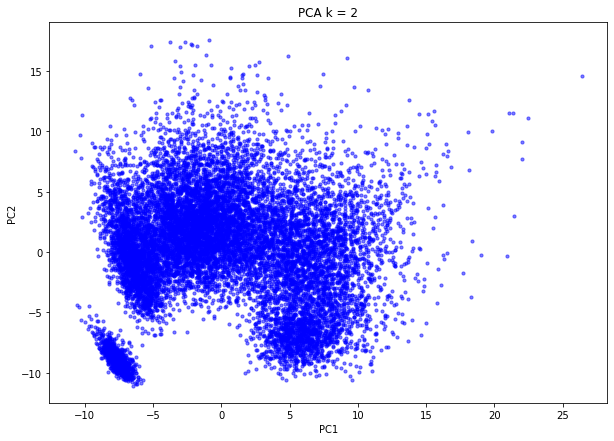

In [36]:
plot_2d(X_reduced[:,0],X_reduced[:,1], f'PCA k = 2', x_label = 'PC1', y_label = 'PC2') 

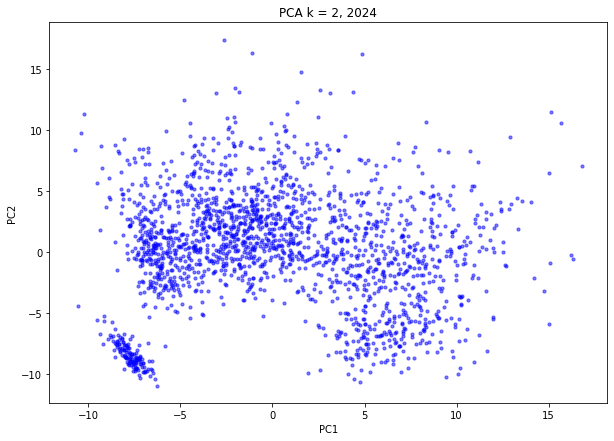

In [38]:
for year in [2024]:
    idx = df['Season_End_Year']==year
    x = X_reduced[df['Season_End_Year']==year,0]
    y = X_reduced[df['Season_End_Year']==year,1]
    plot_2d(x,y, f'PCA k = 2, {year}', x_label = 'PC1', y_label = 'PC2')

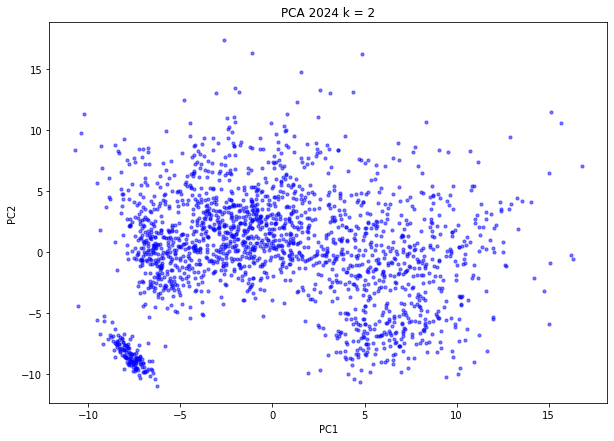

In [19]:
pca = PCA()
pca.fit(X)

X_2024 = pca.transform(X[df['Season_End_Year']==2024])

plot_2d(X_2024[:,0],X_2024[:,1], f'PCA 2024 k = 2', x_label = 'PC1', y_label = 'PC2') 

In [21]:
X_2024.shape

(1923, 123)

In [47]:
def get_important_features(pca, component, n_features):
    
    zipped = zip(xcols,pca.components_[component])
    sorted_features = sorted(zipped, key=lambda x: x[1], reverse=True)[:n_features]

    #sorted_feature_labels = [x[0] for x in sorted_features]

    return pd.DataFrame(sorted_features, columns=['Feature', 'Importance']).set_index('Feature').sort_values(by='Importance', ascending=False)



Text(0, 0.5, 'Variance Explained')

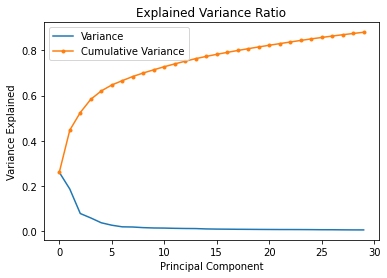

In [48]:
plt.plot(np.arange(30), pca.explained_variance_ratio_[0:30])
plt.plot(np.arange(30), np.cumsum(pca.explained_variance_ratio_[0:30]), marker='.',)
plt.title('Explained Variance Ratio')
plt.legend(['Variance', 'Cumulative Variance'])
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [49]:
pca.explained_variance_ratio_[0:5].sum()

np.float64(0.6202301651179306)

In [50]:
get_important_features(pca, 2, 5)

,Importance
Feature,
Tkl_Tackles,0.198822
Tkl+Int,0.192214
TklW_Tackles,0.192062
TklW,0.192062
Fls,0.189248


In [51]:
#attacking/progressive actions, passing/buildup play, defensive actions

for i in range(5):
    print(f'PCA Component {i+1}, {pca.explained_variance_ratio_[i]}')
    print(get_important_features(pca, i, 5),'\n')
    

PCA Component 1, 0.26039503599765285
                  Importance
Feature                     
npxG+xAG_Per        0.156892
PrgR_Receiving      0.156553
PrgR_Progression    0.156553
xG+xAG_Per          0.155911
Att Pen_Touches     0.152514 

PCA Component 2, 0.18633051572769277
                  Importance
Feature                     
Touches_Touches     0.186800
Live_Touches        0.186783
Mid 3rd_Touches     0.183073
PrgP                0.182147
PrgP_Progression    0.182147 

PCA Component 3, 0.07797484567563812
              Importance
Feature                 
Tkl_Tackles     0.198822
Tkl+Int         0.192214
TklW_Tackles    0.192062
TklW            0.192062
Fls             0.189248 

PCA Component 4, 0.05845786215823956
              Importance
Feature                 
Crs_Pass        0.221048
Crs             0.221030
CrsPA           0.181547
PassDead_SCA    0.180814
Out_Corner      0.155759 

PCA Component 5, 0.03707190555870732
              Importance
Feature                 
P

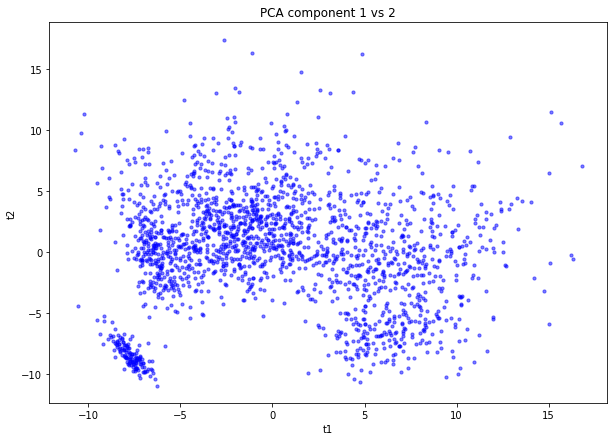

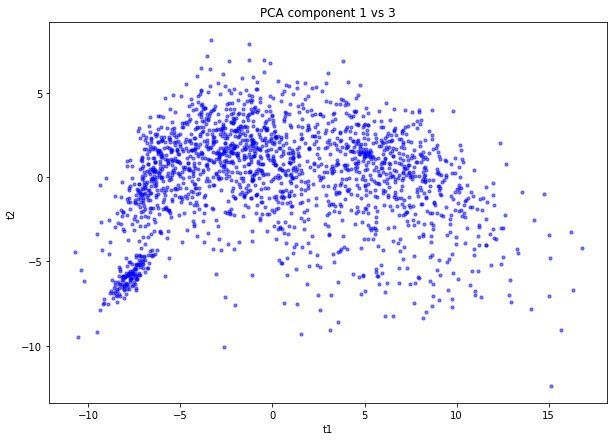

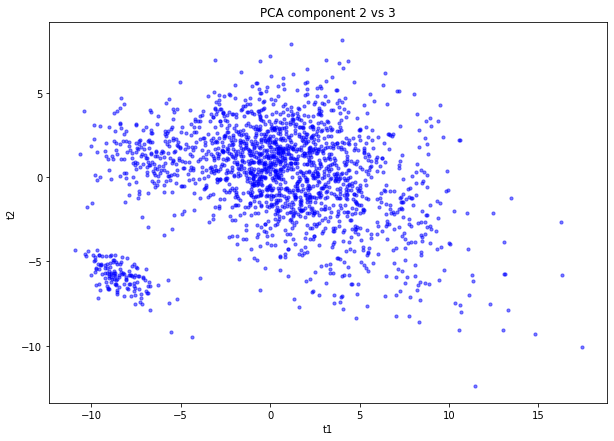

In [52]:
plot_2d(X_2024[:,0],X_2024[:,1], f'PCA component 1 vs 2')
plot_2d(X_2024[:,0],X_2024[:,2], f'PCA component 1 vs 3')
plot_2d(X_2024[:,1],X_2024[:,2], f'PCA component 2 vs 3')

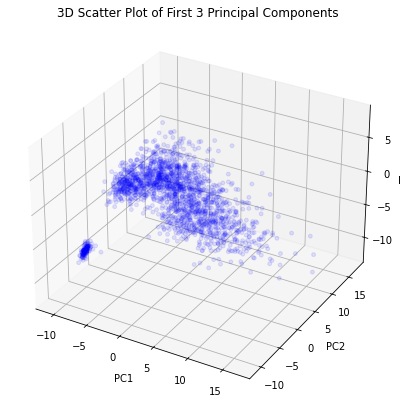

In [53]:
c1,c2,c3 = X_2024[:,0],X_2024[:,1],X_2024[:,2]

# Assuming c1, c2, c3 are your first 3 PCA components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(c1, c2, c3, c='blue', s=15, alpha=0.1)

# Label axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of First 3 Principal Components')

plt.show()

In [54]:
X_2024_cluster = X_2024[:,0:5]

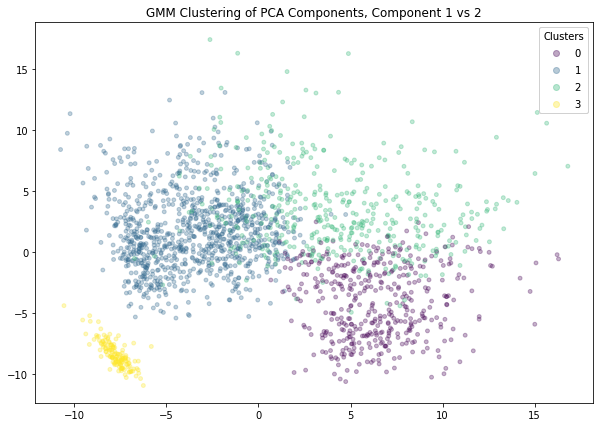

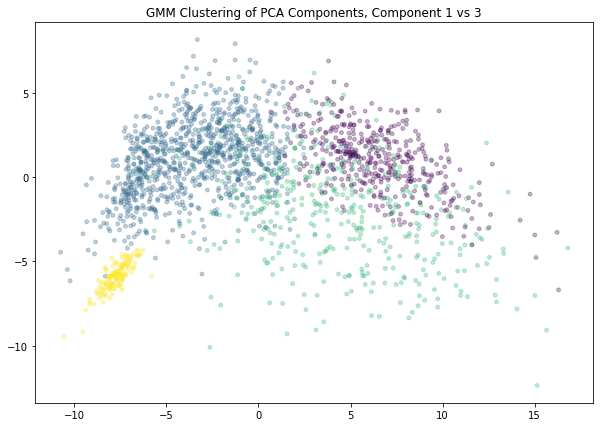

In [55]:
from sklearn.mixture import GaussianMixture

n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(X_2024)
labels_gmm = gmm.predict(X_2024)

fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = plt.scatter(c1, c2, c=labels_gmm, s=15, alpha=0.3)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.title('GMM Clustering of PCA Components, Component 1 vs 2')
plt.show()
fig = plt.figure(figsize=(10, 7))

plt.scatter(c1, c3, c=labels_gmm, s=15, alpha=0.3)
plt.title('GMM Clustering of PCA Components, Component 1 vs 3')
plt.show()

In [56]:
from scipy.sparse.csgraph import shortest_path
import scipy.spatial.distance as scdist
from scipy.sparse import linalg as ll

def isomap(x, epsilon, k=2):
    
    m = x.shape[0]
    
    #pairwise distances between data points
    pairwise = scdist.pdist(x)
    pairwise = scdist.squareform(pairwise)
    print('pairwise distance matrix calculated')
    
    #adjacency matrix (m x m)
    A = np.where(pairwise<epsilon, pairwise,0)
    
    #shortest-path distance matrix (m x m)
    D = shortest_path(A)
    print('shortest path matrix calculated')
    
    #raise a ValueError if there are disconnected clusters in data
    if np.isinf(D).any():
        raise ValueError('Epsilon is too small, there are disconnected clusters in the data. Try a larger value of epsilon')
    
    #centering matrix H = I - (1/m)11.T (m x m)
    one = np.ones(m)[:,np.newaxis]
    H = np.identity(m)-(one@one.T)/m
    
    #C matrix = -(1/2)H(D^2)H (m x m)
    C = -H@np.square(D)@H/2
    
    #eigendecomposition
    S,W = ll.eigs(C, k=k)
    S = S.real
    W = W.real
    
    #lower-dimensional representation of the data Z.T = (w1,...,wk)(diag(lambda^1/2))
    ZT = W@np.diag(np.sqrt(S))
    return ZT.T

In [57]:
one_year = X[df['Season_End_Year']==2024]
z_2 = isomap(one_year, 20, k=2)

pairwise distance matrix calculated
shortest path matrix calculated


<ipython-input-58-edc5aa9f84d6>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


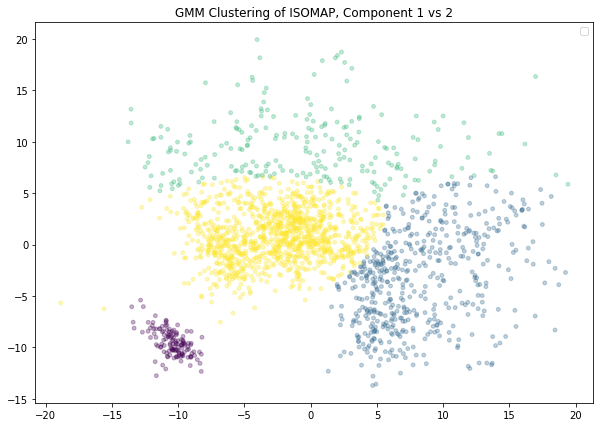

In [58]:
from sklearn.mixture import GaussianMixture

n_components = 4
gmm_isomap = GaussianMixture(n_components=n_components, covariance_type='full')
gmm_isomap.fit(z_2.T)
labels_gmm_isomap = gmm_isomap.predict(z_2.T)

fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
plt.scatter(z_2[0], z_2[1], c=labels_gmm_isomap, s=15, alpha=0.3)
plt.title('GMM Clustering of ISOMAP, Component 1 vs 2')
plt.legend()
plt.show()


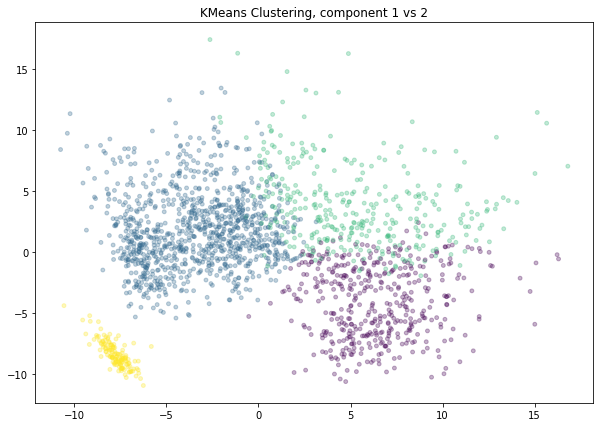

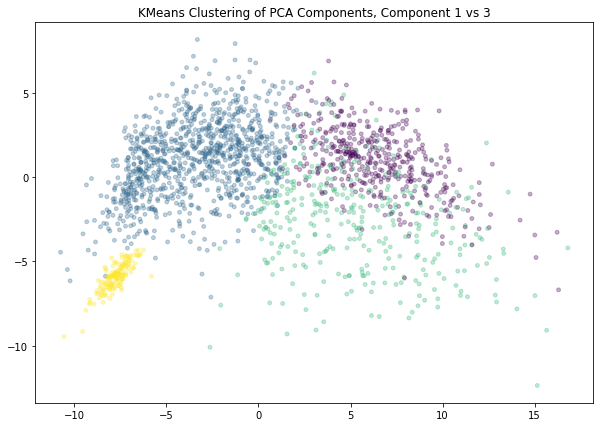

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_2024)
labels_km = kmeans.predict(X_2024)

fig = plt.figure(figsize=(10, 7))

scatter = plt.scatter(c1, c2, c=labels_km, s=15, alpha=0.3)
plt.title('KMeans Clustering, component 1 vs 2')

fig = plt.figure(figsize=(10, 7))
plt.scatter(c1, c3, c=labels_km, s=15, alpha=0.3)
plt.title('KMeans Clustering of PCA Components, Component 1 vs 3')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


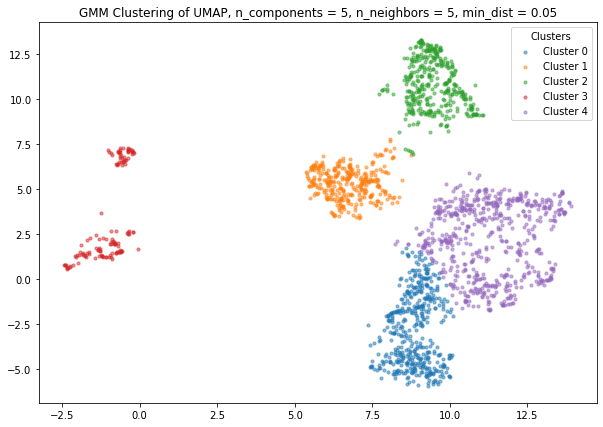

In [60]:
# Umap

random.seed(42)
from umap import UMAP

umapper = UMAP(n_neighbors=5, min_dist=0.05, metric='euclidean',random_state=42)

mapped = umapper.fit_transform(X)[df['Season_End_Year']==2024]


# Step 2: GMM Clustering
gmm_umap = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_umap.fit(mapped)
gmm_labels_umap = gmm_umap.predict(mapped)
gmm_probs_umap = gmm_umap.predict_proba(mapped)
# Step 3: Plot
plt.figure(figsize=(10, 7))

# Plot each cluster separately to make a legend
for cluster_id in np.unique(gmm_labels_umap):
    idx = gmm_labels_umap == cluster_id
    plt.scatter(mapped[idx, 0], mapped[idx, 1], s=10, alpha=0.5, label=f'Cluster {cluster_id}')

plt.title('GMM Clustering of UMAP, n_components = 5, n_neighbors = 5, min_dist = 0.05')
plt.legend(title='Clusters')
plt.show()

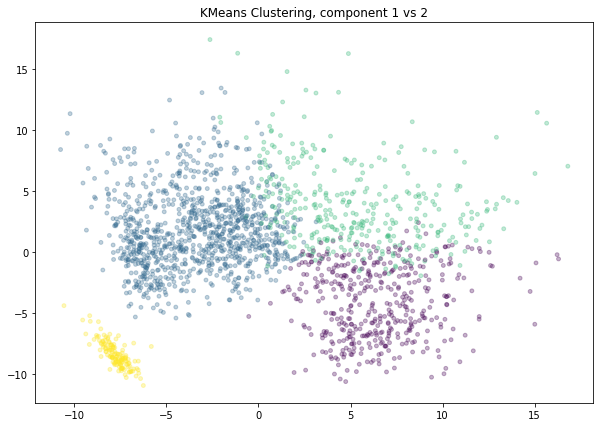

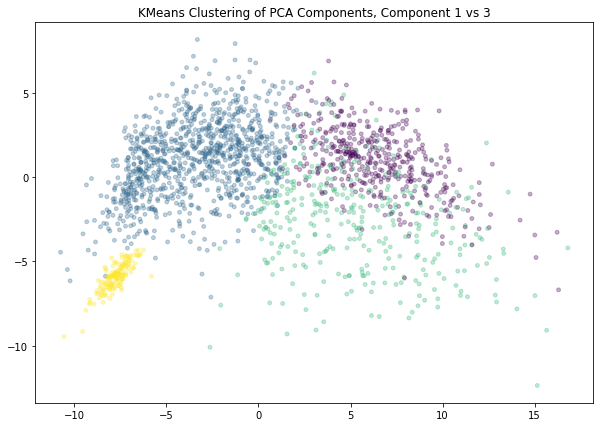

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_2024)
labels_km = kmeans.predict(X_2024)

fig = plt.figure(figsize=(10, 7))

scatter = plt.scatter(c1, c2, c=labels_km, s=15, alpha=0.3)
plt.title('KMeans Clustering, component 1 vs 2')

fig = plt.figure(figsize=(10, 7))
plt.scatter(c1, c3, c=labels_km, s=15, alpha=0.3)
plt.title('KMeans Clustering of PCA Components, Component 1 vs 3')
plt.show()

<Axes: xlabel='GMM_Cluster_PCA', ylabel='Pos'>

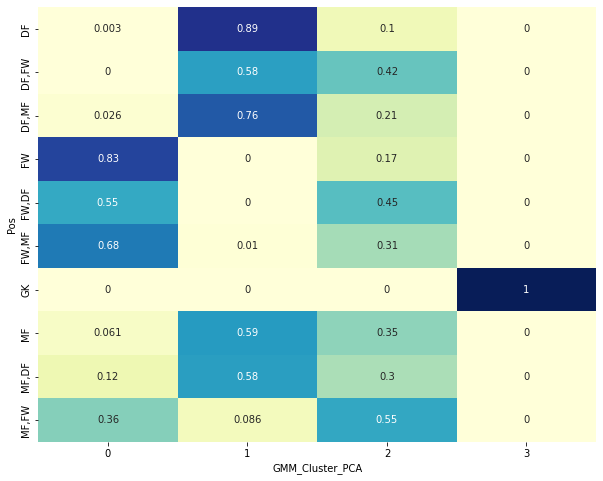

In [84]:
import seaborn as sns 
df_2024 = df[df['Season_End_Year'] == 2024].copy()

df_2024['GMM_Cluster_PCA'] = labels_gmm
df_2024['KMeans_Cluster_PCA'] = labels_km
df_2024['GMM_Cluster_ISOMAP'] = labels_gmm_isomap
df_2024['GMM_Cluster_UMAP'] = gmm_labels_umap
df_2024['GMM_Prob_UMAP'] = gmm_probs_umap.max(axis=1)
df_2024['Attack'] = X_2024[:,0]
df_2024['Buildup'] = X_2024[:,1]
df_2024['Defending'] = X_2024[:,2]
df_2024['Cross/FK'] = X_2024[:,3]
df_2024['Carries/Prog Pass'] = X_2024[:,4]

heat_map = df_2024.groupby(['Pos','GMM_Cluster_PCA']).size().unstack(fill_value=0)
heat_map = heat_map.div(heat_map.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, cmap='YlGnBu', cbar=False) 

In [157]:
#(df_2024['GMM_Prob_UMAP']>0.99)  & 
df_2024[(df_2024['GMM_Cluster_UMAP'] > 1) & (df_2024['Squad'] == 'Tottenham') ][['Pos','Player','Squad','GMM_Cluster_UMAP','GMM_Prob_UMAP','Attack','Buildup','Defending','Cross/FK','Carries/Prog Pass']].sort_values('Attack', ascending = False).head(30)

,Pos,Player,Squad,GMM_Cluster_UMAP,GMM_Prob_UMAP,Attack,Buildup,Defending,Cross/FK,Carries/Prog Pass
13458,MF,James Maddison,Tottenham,4,0.999977,9.028940,8.387819,-7.303673,0.198538,2.102261
13457,MF,Giovani Lo Celso,Tottenham,4,1.000000,4.885207,16.279668,-2.641258,-3.112376,0.174734
13460,DF,Pedro Porro,Tottenham,4,1.000000,1.154916,8.178528,-1.070189,3.914553,2.605911
13459,MF,Pape Matar Sarr,Tottenham,4,0.999882,0.296931,4.335219,-0.029553,-2.836780,-1.102326
13463,"MF,DF",Oliver Skipp,Tottenham,4,0.999925,-2.327317,2.073600,2.584925,-0.981966,-0.245630
13450,MF,Yves Bissouma,Tottenham,4,1.000000,-4.502133,10.581378,2.220380,-2.784944,-1.522006
13454,MF,Pierre Højbjerg,Tottenham,4,1.000000,-4.832502,12.467107,-2.143551,-4.044731,-0.075877
13451,DF,Ben Davies,Tottenham,2,1.000000,-5.050513,5.031654,-0.651546,-4.911078,-0.271837
13465,DF,Micky van de Ven,Tottenham,2,0.999999,-7.035828,3.725754,-0.720896,-5.102681,-0.623680
13462,DF,Cristian Romero,Tottenham,2,1.000000,-7.454092,7.418722,-1.444407,-6.444351,0.280047


In [65]:
df_2024['GMM_Prob_UMAP']

11725    0.997028
11726    0.999619
11727    0.997730
11728    0.999994
11729    0.999985
           ...   
13643    0.831425
13644    1.000000
13645    0.999992
13646    0.999358
13647    0.999990
Name: GMM_Prob_UMAP, Length: 1923, dtype: float64

<Axes: xlabel='KMeans_Cluster_PCA', ylabel='Pos'>

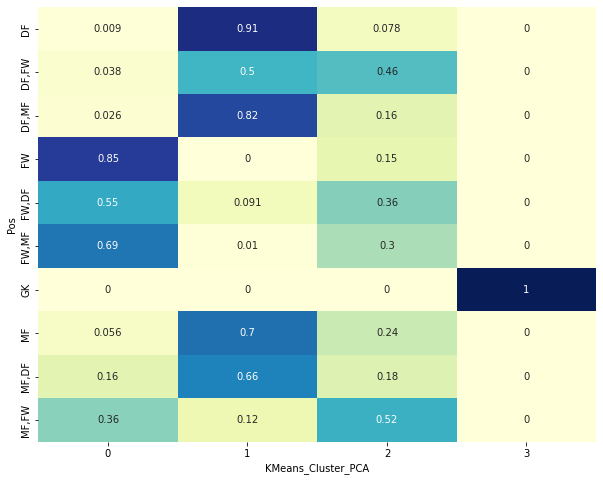

In [373]:
heat_map = df_2024.groupby(['Pos','KMeans_Cluster_PCA']).size().unstack(fill_value=0)
heat_map = heat_map.div(heat_map.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, cmap='YlGnBu', cbar=False) 

<Axes: xlabel='GMM_Cluster_ISOMAP', ylabel='Pos'>

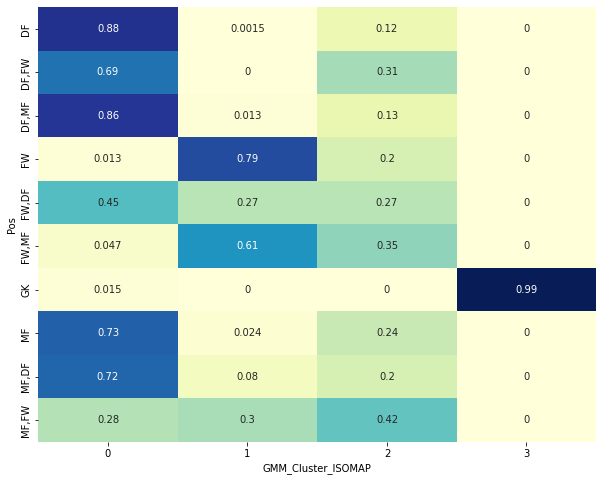

In [374]:
heat_map = df_2024.groupby(['Pos','GMM_Cluster_ISOMAP']).size().unstack(fill_value=0)
heat_map = heat_map.div(heat_map.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, cmap='YlGnBu', cbar=False)

<Axes: xlabel='GMM_Cluster_UMAP', ylabel='Pos'>

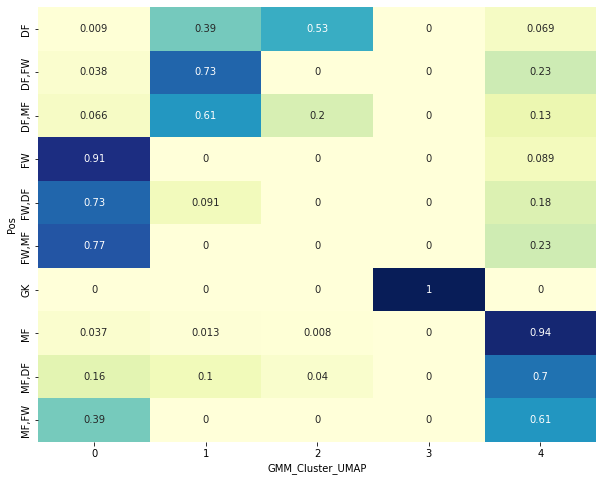

In [145]:
heat_map = df_2024.groupby(['Pos','GMM_Cluster_UMAP']).size().unstack(fill_value=0)
heat_map = heat_map.div(heat_map.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, cmap='YlGnBu', cbar=False)

In [358]:
def radial_chart(means, title):
    labels = ['Attacking','Buildup','Defending','Crossing/Free Kicks','Carries + Progressive Passing']
    colors = ['purple','blue','green','yellow','red']
    
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
    for i in range(n_components):
        values = means[i,:5].tolist()
        angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
        values +=[values[0]]
        angles += [angles[0]]
        ax.plot(angles,values, linewidth=2, color = colors[i], label=f'Cluster {i}', alpha =0.5)
        ax.fill(angles, values, color=colors[i], alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    ax.set_title(title, size=14)
    
    plt.show()
    #return fig, ax

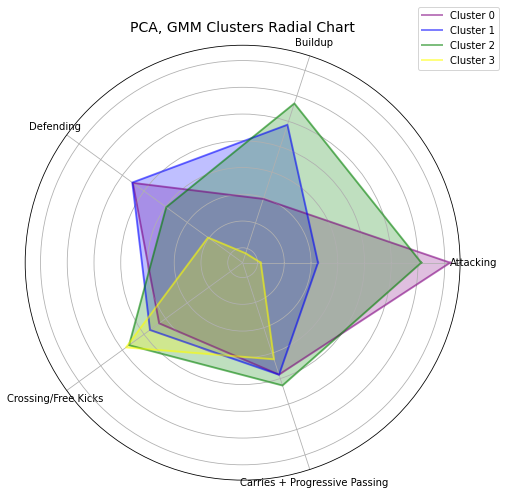

In [359]:
radial_chart(gmm.means_, 'PCA, GMM Clusters Radial Chart')

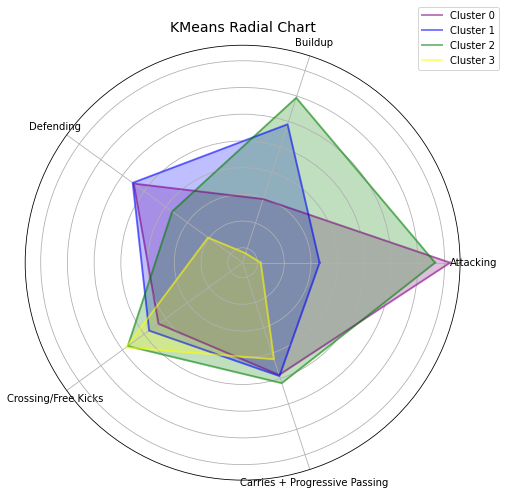

In [360]:
radial_chart(kmeans.cluster_centers_, 'KMeans Radial Chart')

In [353]:
#positions = ['DF','MF','FW','GK']

#for pos in  positions:
#    x1 =[]
#    x2 = []
#    for y in years:
#        year = X_reduced[(df['Season_End_Year']==y) & (df['Pos'].str.contains(pos))]
##\        x1.append(year[0].mean())
 #       x2.append(year[1].mean())      
 #   
 #   plt.plot(x1,x2, marker = 'o')
  #  for i in range(len(x1)):
   #     plt.text(x1[i], x2[i], years[i], fontsize=9, ha='right', va='bottom')
    ##plt.title(f'Avg position of {pos} players over time')
    #plt.show()

In [354]:
df_2024['GMM_Cluster_Isomap'] = labels_gmm_isomap
#df_2024 = df_2024.drop(columns = ['GMM Cluster Isomap'])

In [355]:
X_2024.shape

(1923, 123)

In [356]:
for i in range(n_components):
    means = X_2024[df_2024['GMM_Cluster_Isomap'] == i,:5].mean(axis=0)
    print(f'Cluster {i} means: {means}')

Cluster 0 means: [-2.5045427   1.10981484  1.01686813  0.0812587  -0.09688895]
Cluster 1 means: [ 6.26640228 -4.65705875  0.94467386 -1.17833855  0.07197481]
Cluster 2 means: [ 4.06245996  4.97802372 -2.2474848  -0.42185219 -0.29048645]
Cluster 3 means: [-7.72129244 -8.42599357 -5.86276532  1.67645515 -1.5248406 ]


Text(0.5, 1.0, 'ISOMAP GMM Clusters Radial Chart')

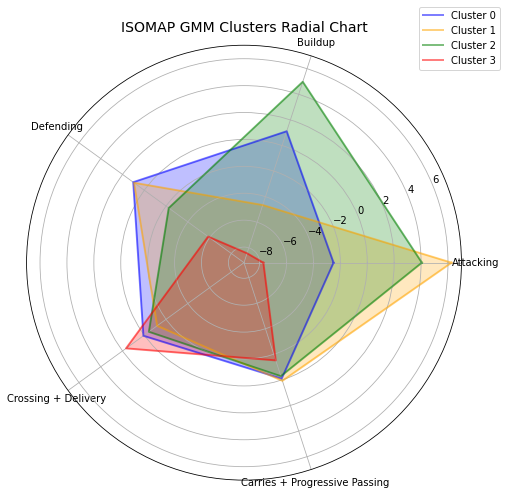

In [376]:

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
for i in range(n_components):
    values = X_2024[df_2024['GMM_Cluster_ISOMAP'] == i,:5].mean(axis=0).tolist()
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    values +=[values[0]]
    angles += [angles[0]]
    ax.plot(angles,values, linewidth=2, color = colors[i], label=f'Cluster {i}', alpha =0.5)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax.set_title('ISOMAP GMM Clusters Radial Chart', size=14)

Text(0.5, 1.0, 'UMAP GMM Clusters Radial Chart')

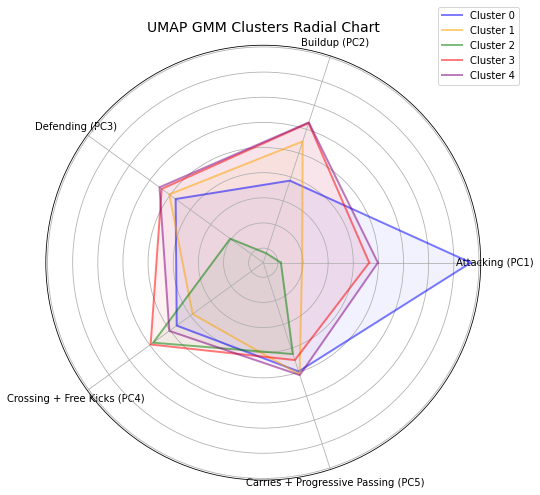

In [380]:
labels = ['Attacking (PC1)','Buildup (PC2)','Defending (PC3)','Crossing + Free Kicks (PC4)','Carries + Progressive Passing (PC5)']
colors = ['blue','orange','green','red','purple']
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
for i in range(5):
    values = X_2024[df_2024['GMM_Cluster_UMAP'] == i,:5].mean(axis=0).tolist()
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    values +=[values[0]]
    angles += [angles[0]]
    ax.plot(angles,values, linewidth=2, color = colors[i], label=f'Cluster {i}', alpha =0.5)
    ax.fill(angles, values, color=colors[i], alpha=0.05)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax.set_title('UMAP GMM Clusters Radial Chart', size=14)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


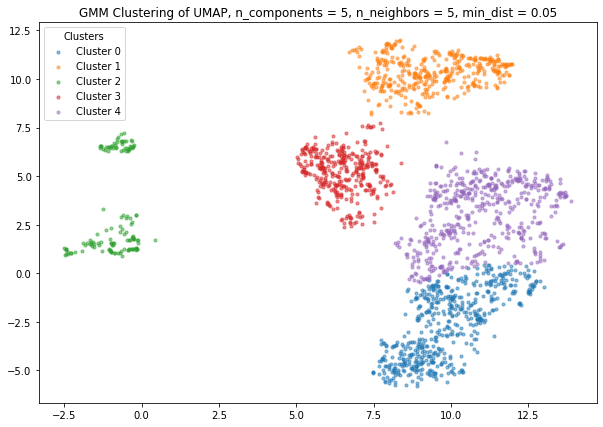

In [ ]:
# Umap

random.seed(42)
from umap import UMAP

umapper = UMAP(n_neighbors=5, min_dist=0.1, metric='euclidean',random_state=42)

mapped = umapper.fit_transform(X)[df['Season_End_Year']==2024]


# Step 2: GMM Clustering
gmm_umap = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_umap.fit(mapped)
gmm_labels_umap = gmm_umap.predict(mapped)

# Step 3: Plot
plt.figure(figsize=(10, 7))

# Plot each cluster separately to make a legend
for cluster_id in np.unique(gmm_labels_umap):
    idx = gmm_labels_umap == cluster_id
    plt.scatter(mapped[idx, 0], mapped[idx, 1], s=10, alpha=0.5, label=f'Cluster {cluster_id}')

plt.title('GMM Clustering of UMAP, n_components = 5, n_neighbors = 5, min_dist = 0.05')
plt.legend(title='Clusters')
plt.show()

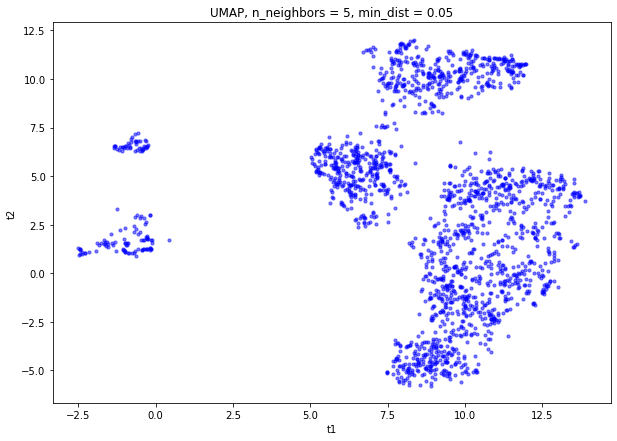

In [370]:
# Umap

random.seed(42)
from umap import UMAP


# Plot each cluster separately to make a legend
plot_2d(mapped[:, 0], mapped[:, 1], title = 'UMAP, n_neighbors = 5, min_dist = 0.05')


<Axes: xlabel='GMM_Cluster_UMAP', ylabel='Pos'>

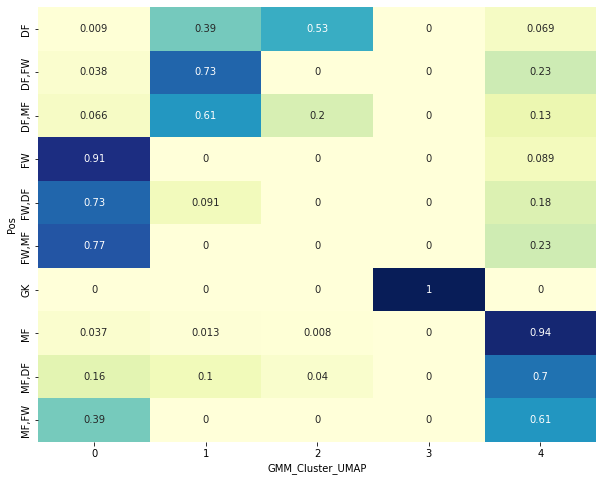

In [371]:
heat_map = df_2024.groupby(['Pos','GMM_Cluster_UMAP']).size().unstack(fill_value=0)
heat_map = heat_map.div(heat_map.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, cmap='YlGnBu', cbar=False) 

In [331]:
df_2024.query('''GMM_Cluster_UMAP == 0 & Comp == 'Premier League' & Squad == 'Tottenham' ''').head(10)

,Unnamed: 0,Season_End_Year,Squad,Comp,Player,Nation,Pos,Age,Born,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,PK,PKatt,CrdY,CrdR,PrgC_Progression,PrgP_Progression,PrgR_Progression,Gls_Per,Ast_Per,G+A_Per,G_minus_PK_Per,xG_Per,xAG_Per,xG+xAG_Per,npxG_Per,npxG+xAG_Per,Mins_Per_90,SoT_percent_Standard,Sh_per_90_Standard,SoT_per_90_Standard,G_per_Sh_Standard,G_per_SoT_Standard,Dist_Standard,FK_Standard,npxG_per_Sh_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,xA_Expected,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,In_Corner,Out_Corner,Str_Corner,Cmp_Outcomes,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Live_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GMM_Cluster_PCA,KMeans_Cluster_PCA,GMM_Cluster_ISOMAP,GMM_Cluster_UMAP
13453,2572,2024,Tottenham,Premier League,Son Heung-min,KOR,FW,31.0,1992.0,35,34,2934,32.6,0.06135,0.06135,0.030675,0.0,3.650307,4.263804,9.969325,0.52,0.31,0.83,0.46,0.37,0.36,0.73,0.32,0.68,32.6,45.8,2.55,1.17,0.18,0.39,15.5,0.0,0.13,27.208589,32.975460,82.5,371.871166,86.564417,16.288344,18.680982,87.2,9.110429,10.368098,87.9,0.705521,1.165644,60.5,0.254601,2.085890,1.226994,1.993865,0.061350,4.263804,30.552147,0.092025,0.521472,0.061350,1.104294,0.306748,0.092025,0.00000,0.0,0.0,27.208589,0.122699,1.104294,3.96,3.312883,0.000000,0.337423,0.184049,0.092025,0.030675,0.52,0.398773,0.0,0.092025,0.000000,0.030675,0.000000,0.644172,0.398773,0.184049,0.214724,0.245399,0.306748,0.644172,47.6,0.337423,0.122699,0.030675,0.092025,0.245399,0.889571,0.122699,0.000000,41.533742,0.245399,2.668712,14.049080,25.245399,6.503067,41.472393,2.822086,1.196319,42.4,1.441718,51.1,28.435583,174.478528,91.687117,3.650307,1.349693,1.963190,1.687117,1.257669,33.742331,9.969325,0.0,0.368098,1.196319,0.613497,1.104294,0.398773,0.030675,0.030675,0.030675,2.453988,0.153374,0.490798,23.8,2,0,2,0
13455,2574,2024,Tottenham,Premier League,Brennan Johnson,WAL,FW,22.0,2001.0,32,23,2085,23.2,0.00000,0.00000,0.129496,0.0,4.187050,3.107914,12.647482,0.22,0.43,0.65,0.22,0.44,0.35,0.79,0.44,0.79,23.2,38.0,2.16,0.82,0.10,0.26,12.9,0.0,0.21,22.402878,31.424460,71.3,315.755396,76.748201,14.374101,17.482014,82.2,6.820144,9.366906,72.8,0.647482,1.942446,33.3,0.194245,1.942446,1.381295,1.683453,0.431655,3.107914,30.647482,0.000000,0.000000,0.043165,2.935252,0.561151,0.000000,0.00000,0.0,0.0,22.402878,0.172662,1.597122,3.02,2.374101,0.000000,0.172662,0.258993,0.129496,0.086331,0.56,0.474820,0.0,0.000000,0.043165,0.000000,0.043165,1.122302,0.647482,0.604317,0.215827,0.302158,0.517986,1.338129,38.7,0.820144,1.597122,0.043165,1.553957,0.431655,1.553957,0.517986,0.043165,42.172662,0.604317,4.057554,13.640288,24.949640,6.647482,42.172662,3.064748,1.079137,35.2,1.683453,54.9,27.539568,169.985612,90.258993,4.187050,1.510791,2.071942,1.510791,0.820144,32.287770,12.647482,0.0,0.733813,1.251799,0.517986,2.935252,0.647482,0.000000,0.000000,0.000000,3.237410,0.215827,0.690647,23.8,0,0,2,0
13456,2575,2024,Tottenham,Premier League,Dejan Kulusevski,SWE,"FW,MF",23.0,2000.0,36,31,2762,30.7,0.00000,0.00000,0.228096,0.0,4.920348,4.692252,12.643012,0.26,0.10,0.36,0.26,0.15,0.25,0.40,0.15,0.40,30.7,40.4,1.86,0.75,0.14,0.3

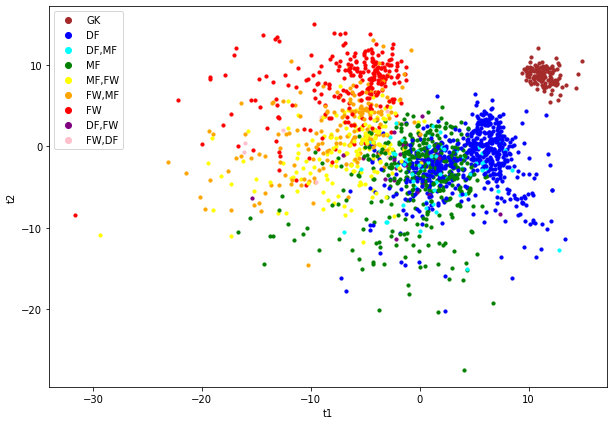

In [93]:
colors = {"GK": "brown", "DF": "blue", "DF,MF": "aqua", "MF": "green", "MF,FW": "yellow", "FW,MF": "orange", "FW": "red", 'DF,FW': "purple", 'FW,DF': "pink"}
color_list = df.Pos.map(colors).to_list()

plot = z_2
fig, ax = plt.subplots(figsize = (10,7))
for i in range(plot.shape[1]):
    ax.scatter(plot[0][i], plot[1][i], c = color_list[i], s = 10)
ax.set_xlabel('t1')
ax.set_ylabel('t2')
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
ax.legend(markers, colors.keys(), numpoints=1)
plt.show()

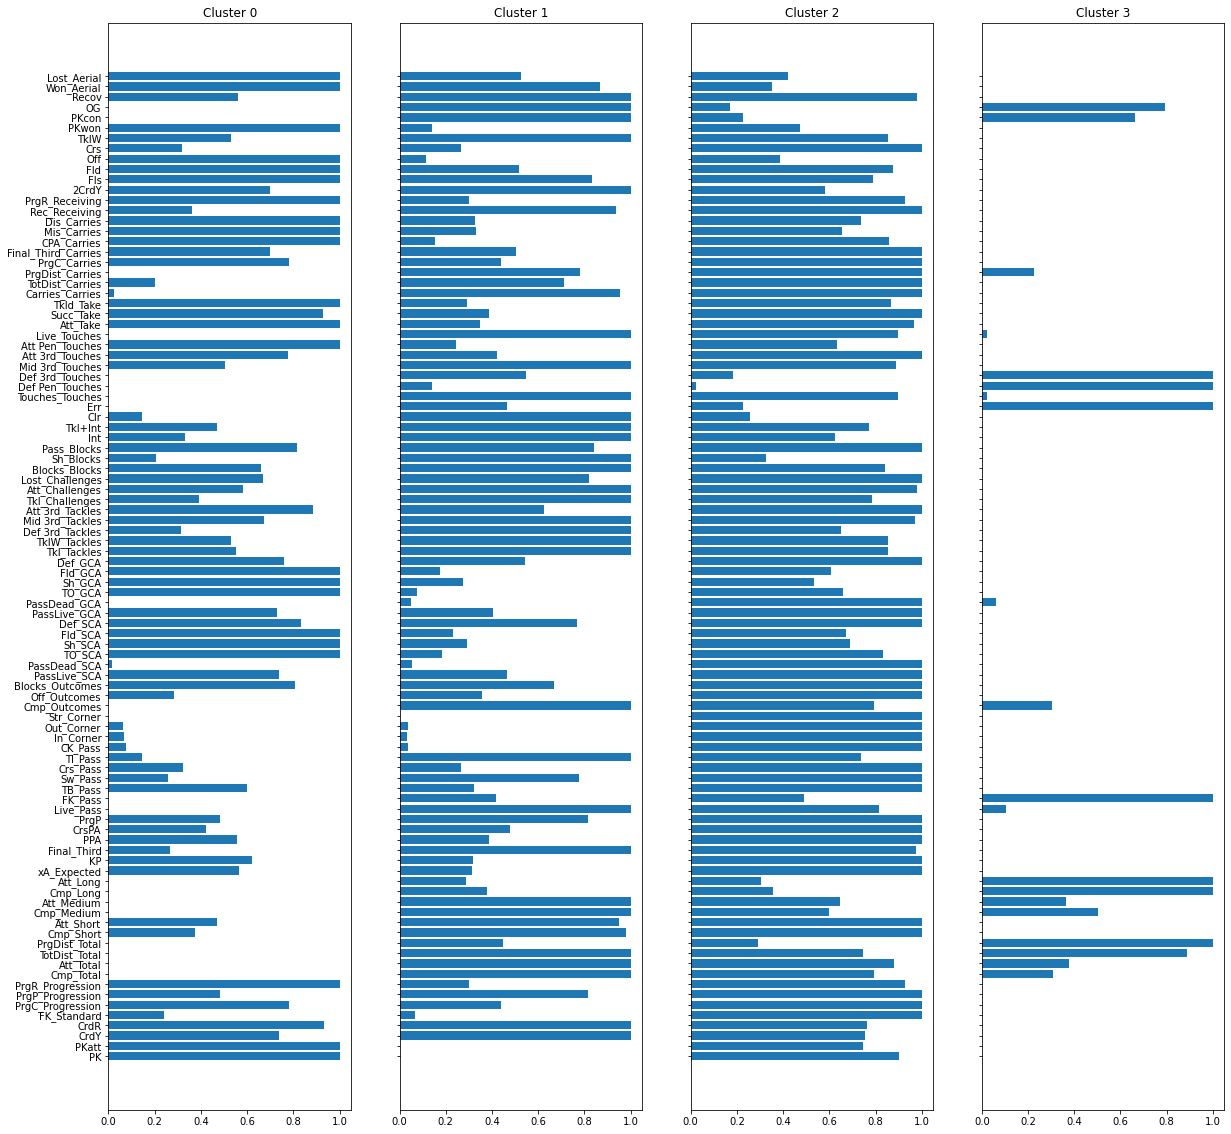

In [340]:
cluster_feature_means = df_2024[cols_convert_per_90 + ['GMM_Cluster_PCA']].groupby('GMM_Cluster_PCA').mean()

cluster_feature_means = (cluster_feature_means - cluster_feature_means.min()) / (cluster_feature_means.max() - cluster_feature_means.min())

num_clusters = cluster_feature_means.shape[0]

fig, axs = plt.subplots(1, num_clusters, figsize=(5*num_clusters, 20), sharey=True)

for cluster_id, ax in enumerate(axs):
    cluster_means = cluster_feature_means.loc[cluster_id]
    ax.barh(cluster_means.index, cluster_means.values)
    ax.set_title(f'Cluster {cluster_id}')
    ax.invert_yaxis()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


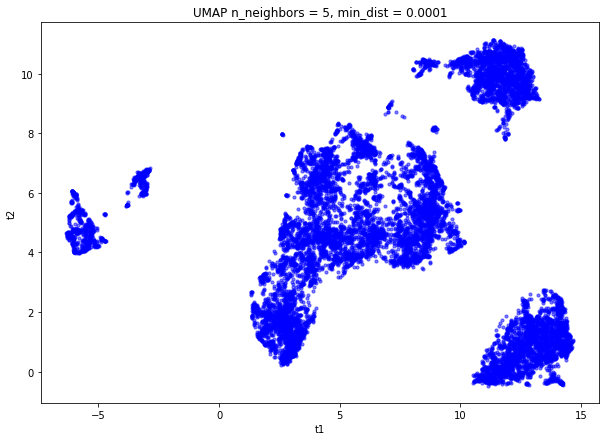

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


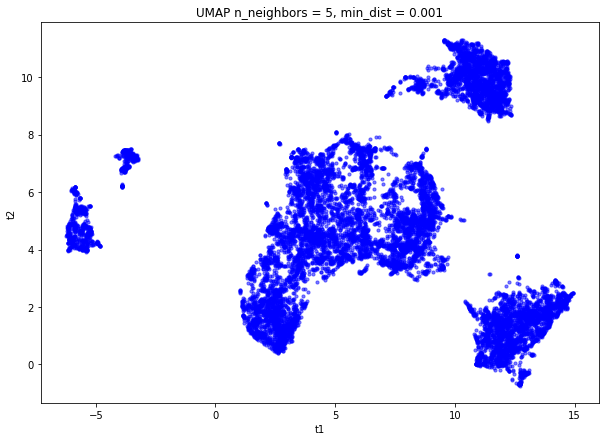

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


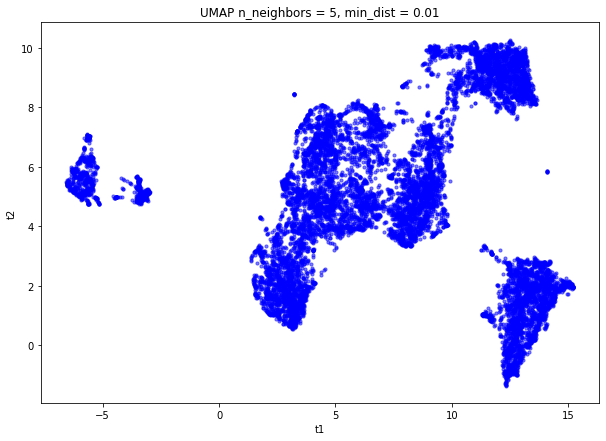

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


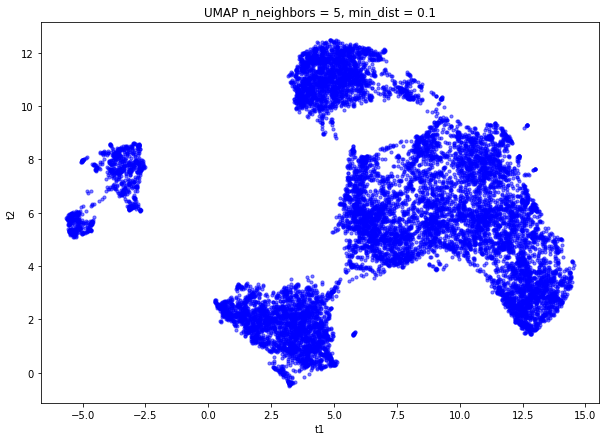

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


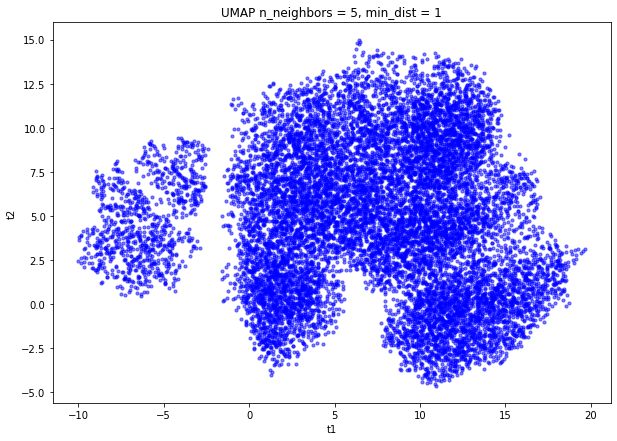

In [159]:
# lets try umap
from umap import UMAP

umapper = UMAP(n_neighbors=5, min_dist=0.1, metric='euclidean')

mapped = umapper.fit_transform(one_year)

neighbors = [5]
min_dists = [ 10**x for x in range(-4,1)]

umap_dict = {}

for n in neighbors:
    umap_dict[n] = {}
    for dist in min_dists:
        umap_dict[n][dist] = UMAP(n_neighbors=n, min_dist=dist, metric='euclidean').fit_transform(X)
        plot = umap_dict[n][dist].T
        plot_2d(plot[0], plot[1], f'UMAP n_neighbors = {n}, min_dist = {dist}')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


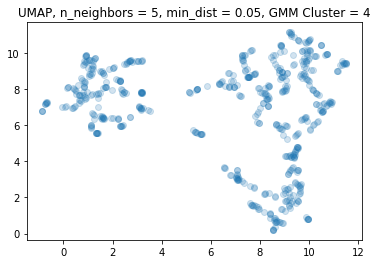

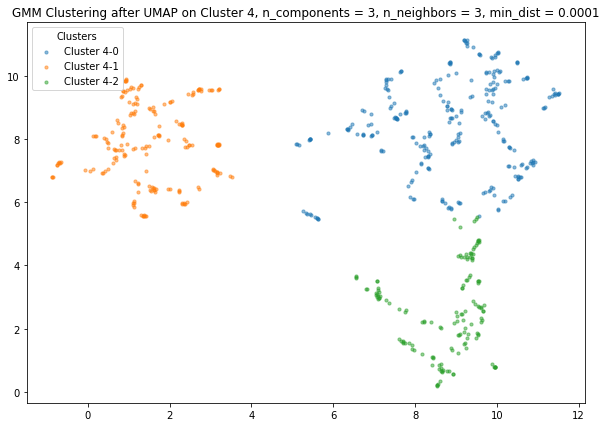

In [159]:
midfielders = df_2024[(gmm_labels_umap == 4)]

umapper = UMAP(n_neighbors=3, min_dist=0.0001, metric='euclidean',random_state=42)

mapped = umapper.fit_transform(X[midfielders.index])

plt.scatter(mapped[:, 0], mapped[:, 1], alpha = 0.2)
plt.title( 'UMAP, n_neighbors = 5, min_dist = 0.05, GMM Cluster = 4')

# Step 2: GMM Clustering
gmm_umap = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_umap.fit(mapped)
gmm_labels_umap_mf = gmm_umap.predict(mapped)

# Step 3: Plot
plt.figure(figsize=(10, 7))

# Plot each cluster separately to make a legend
for cluster_id in np.unique(gmm_labels_umap_mf):
    idx = gmm_labels_umap_mf == cluster_id
    plt.scatter(mapped[idx, 0], mapped[idx, 1], s=10, alpha=0.5, label=f'Cluster 4-{cluster_id}')

plt.title('GMM Clustering after UMAP on Cluster 4, n_components = 3, n_neighbors = 3, min_dist = 0.0001')
plt.legend(title='Clusters')
plt.show()

In [141]:
midfielders.head(10)

,Unnamed: 0,Season_End_Year,Squad,Comp,Player,Nation,Pos,Age,Born,MP_Playing,Starts_Playing,Min_Playing,Mins_Per_90_Playing,PK,PKatt,CrdY,CrdR,PrgC_Progression,PrgP_Progression,PrgR_Progression,Gls_Per,Ast_Per,G+A_Per,G_minus_PK_Per,xG_Per,xAG_Per,xG+xAG_Per,npxG_Per,npxG+xAG_Per,Mins_Per_90,SoT_percent_Standard,Sh_per_90_Standard,SoT_per_90_Standard,G_per_Sh_Standard,G_per_SoT_Standard,Dist_Standard,FK_Standard,npxG_per_Sh_Expected,Cmp_Total,Att_Total,Cmp_percent_Total,TotDist_Total,PrgDist_Total,Cmp_Short,Att_Short,Cmp_percent_Short,Cmp_Medium,Att_Medium,Cmp_percent_Medium,Cmp_Long,Att_Long,Cmp_percent_Long,xA_Expected,KP,Final_Third,PPA,CrsPA,PrgP,Live_Pass,FK_Pass,TB_Pass,Sw_Pass,Crs_Pass,TI_Pass,CK_Pass,In_Corner,Out_Corner,Str_Corner,Cmp_Outcomes,Off_Outcomes,Blocks_Outcomes,SCA90_SCA,PassLive_SCA,PassDead_SCA,TO_SCA,Sh_SCA,Fld_SCA,Def_SCA,GCA90_GCA,PassLive_GCA,PassDead_GCA,TO_GCA,Sh_GCA,Fld_GCA,Def_GCA,Tkl_Tackles,TklW_Tackles,Def 3rd_Tackles,Mid 3rd_Tackles,Att 3rd_Tackles,Tkl_Challenges,Att_Challenges,Tkl_percent_Challenges,Lost_Challenges,Blocks_Blocks,Sh_Blocks,Pass_Blocks,Int,Tkl+Int,Clr,Err,Touches_Touches,Def Pen_Touches,Def 3rd_Touches,Mid 3rd_Touches,Att 3rd_Touches,Att Pen_Touches,Live_Touches,Att_Take,Succ_Take,Succ_percent_Take,Tkld_Take,Tkld_percent_Take,Carries_Carries,TotDist_Carries,PrgDist_Carries,PrgC_Carries,Final_Third_Carries,CPA_Carries,Mis_Carries,Dis_Carries,Rec_Receiving,PrgR_Receiving,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,Won_Aerial,Lost_Aerial,Won_percent_Aerial,GMM_Cluster_PCA,KMeans_Cluster_PCA,GMM_Cluster_ISOMAP,GMM_Cluster_UMAP,GMM_Prob_UMAP,Attack,Buildup,Defending,Cross/FK,Carries/Prog Pass,mf_cluster
11726,2,2024,Alavés,La Liga,Carlos Benavídez,URU,MF,25.0,1998.0,29,10,1136,12.6,0.000000,0.000000,0.396127,0.000000,0.713028,4.753521,0.396127,0.24,0.08,0.32,0.24,0.08,0.04,0.12,0.08,0.12,12.6,50.0,1.11,0.55,0.21,0.43,19.8,0.000000,0.07,25.431338,36.364437,69.9,462.517606,147.596831,11.646127,14.181338,82.1,10.299296,14.102113,73.0,2.931338,6.654930,44.0,0.055458,0.475352,3.565141,0.713028,0.000000,4.753521,35.413732,0.554577,0.079225,0.475352,0.316901,0.237676,0.079225,0.000000,0.000000,0.000000,25.431338,0.079225,0.237676,1.74,1.188380,0.000000,0.000000,0.158451,0.158451,0.237676,0.16,0.158451,0.000000,0.000000,0.000000,0.000000,0.0,4.436620,2.772887,1.505282,2.059859,0.871479,1.505282,2.693662,55.9,1.188380,1.029930,0.396127,0.633803,1.505282,5.941901,2.455986,0.000000,49.753521,2.772887,13.705986,27.570423,8.952465,0.871479,49.753521,0.316901,0.158451,50.0,0.158451,50.0,17.588028,86.355634,40.246479,0.713028,0.792254,0.079225,0.871479,0.396127,22.658451,0.396127,0.0,3.010563,0.713028,0.079225,0.316901,2.772887,0.000000,0.158451,0.0,5.704225,2.772887,2.376761,53.8,1,1,3,4,0.999619,-1.267168,1.174052,7.929629,0.887127,3.214383,0
11727,3,2024,Alavés,La Liga,Antonio Blanco,ESP,MF,23.0,2000.0,33,29,2426,27.0,0.000000,0.000000,0.185491,0.037098,0.741962,4.934048,0.816158,0.00,0.04,0.04,0.00,0.03,0.05,0.08,0.03,0.08,27.0,15.0,0.74,0.11,0.00,0.00,25.1,0.000000,0.04,30.086562,39.064303,77.0,526.793075,204.150866,14.208574,16.471558,86.3,11.500412,14.060181,81.8,3.227535,5.713108,56.5,0.040808,0.741962,3.709810,0.704864,0.296785,4.934048,37.765870,0.927453,0.148392,0.779060,0.556472,0.074196,0.111294,0.037098,0.000000,0.000000,30.086562,0.185491,1.001649,1.67,1.446826,0.037098,0.000000,0.074196,0.111294,0.000000,0.04,0.037098,0.000000,0.000000,0.000000,0.000000,0.0,2.262984,1.335532,1.075845,1.001649,0.185491,1.150041,3.190437,36.0,2.040396,0.927453,0.074196,0.853256,1.298434,3.561418,1.112943,0.000000,47.596867,2.374279,12.576257,27.452597,8.309975,0.667766,47.596867,1.224237,0.704864,57.6,0.296785,24.2,23.000824,97.679308,47.151690,0.741962,0.556472,0.111294,0.704864,0.816158,28.268755,0.816158,0.0,1.335532,1.483924,0.000000,0.556472,1.335532,0.000000,0.000000,0.0,5.935697,0.779060,0.667766,53.8,1,1,3,4,0.997730,-2.561385,0.517728,2.915402,2.321868,0.605707,0
11730,6,2024,Alavés,La L

<ipython-input-161-e7510071d327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielders['mf_cluster'] = gmm_labels_umap_mf


Text(0.5, 1.0, 'UMAP GMM Clusters Radial Chart of Cluster 4')

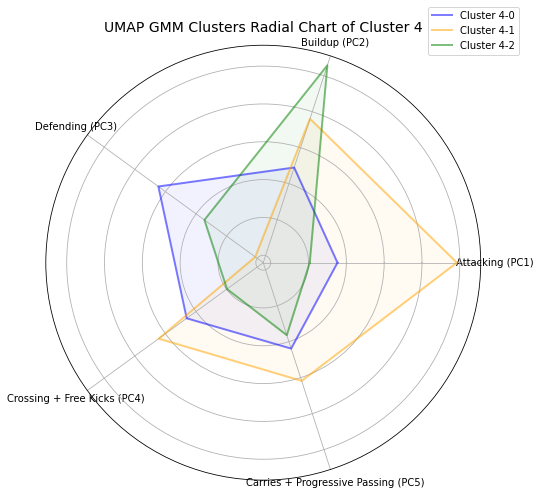

In [161]:

labels = ['Attacking (PC1)','Buildup (PC2)','Defending (PC3)','Crossing + Free Kicks (PC4)','Carries + Progressive Passing (PC5)']
attributes = ['Attack','Buildup','Defending','Cross/FK','Carries/Prog Pass'] 
colors = ['blue','orange','green']
midfielders['mf_cluster'] = gmm_labels_umap_mf
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
for i in range(3):
    values = midfielders[midfielders['mf_cluster'] == i][attributes].mean(axis=0).tolist()
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    values +=[values[0]]
    angles += [angles[0]]
    ax.plot(angles,values, linewidth=2, color = colors[i], label=f'Cluster 4-{i}', alpha =0.5)
    ax.fill(angles, values, color=colors[i], alpha=0.05)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax.set_title('UMAP GMM Clusters Radial Chart of Cluster 4', size=14)

In [168]:
midfielders.query(''' mf_cluster == 2 ''' )[['Pos','Player','Squad','GMM_Cluster_UMAP','GMM_Prob_UMAP','Attack','Buildup','Defending','Cross/FK','Carries/Prog Pass']].sort_values('Buildup', ascending = False).head(50)

,Pos,Player,Squad,GMM_Cluster_UMAP,GMM_Prob_UMAP,Attack,Buildup,Defending,Cross/FK,Carries/Prog Pass
13212,MF,Toni Kroos,Real Madrid,4,1.000000,-2.635319,17.426968,-10.095409,-1.256382,6.616304
12872,MF,Rodri,Manchester City,4,1.000000,-1.131261,16.306017,-5.794310,-9.014393,-0.670335
13457,MF,Giovani Lo Celso,Tottenham,4,1.000000,4.885207,16.279668,-2.641258,-3.112376,0.174734
12712,MF,Exequiel Palacios,Leverkusen,4,1.000000,-2.028006,13.450589,-1.261305,-5.889334,0.495946
13148,DF,Achraf Hakimi,Paris S-G,4,1.000000,4.348689,13.106041,-5.747015,-4.049033,-3.439174
11890,MF,Frenkie de Jong,Barcelona,4,1.000000,-1.818347,13.093863,-3.852408,-5.968969,-2.044991
12719,MF,Granit Xhaka,Leverkusen,4,1.000000,-3.068747,13.077030,-5.750847,-7.343446,-1.182470
13454,MF,Pierre Højbjerg,Tottenham,4,1.000000,-4.832502,12.467107,-2.143551,-4.044731,-0.075877
12940,MF,Yacine Adli,Milan,4,1.000000,-2.101596,11.062616,-4.236886,-1.349468,2.570372
11783,DF,Oleksandr Zinchenko,Arsenal,4,1.000000,-2.459881,10.986631,-2.152022,-1.928034,-0.516473
